## Analyzing CIA World Factbook Data Using SQLite and Python

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

   + population - The population as of 2015.
   + population_growth - The annual population growth rate, as a percentage.
   + area - The total land and water area.
   
In this project, we'll explore the Python SQLite workflow to explore, analyze, and visualize data from this database.

In Python, we learned how to connect to a SQLite database and query it using the sqlite3 module. When working in the Jupyter notebook environment, we can actually use pandas to run SQL queries and display the results neatly as a DataFrame object. We create a sqlite3.Connection instance as usual and then use pandas.read_sql_query(sql, con) to handle running the query and returning the results in a table.

In [1]:
#import pandas and sqlite3
import pandas as pd
import sqlite3

#connect to factbook.db
conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type = 'table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
#Write and run another query that returns the first 
#5 rows of the facts table in the database. 
q = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Summary Statistics

Here are the descriptions for some of the columns:

   + name - The name of the country.
   + area - The total land and sea area of the country.
   + population - The country's population.
   + population_growth- The country's population growth as a percentage.
   + birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
   + death_rate - The country's death rate, or the number of death a year per 1,000 people.
   + area- The country's total area (both land and water).
   + area_land - The country's land area in square kilometers.
   + area_water - The country's waterarea in square kilometers.

Let's start by calculating some summary statistics and look for any outlier countries.

In [3]:
#Single query to find the Minimum population
minpo_q = "SELECT MIN(population) FROM facts"
pd.read_sql_query(minpo_q, conn)

,MIN(population)
0,0


In [4]:
#Single query to find the Maximum population
maxpo_q = "SELECT MAX(population) FROM facts"
pd.read_sql_query(maxpo_q, conn)

,MAX(population)
0,7256490011


In [5]:
#Single query to find the Minimum population growth
minpogr_q = "SELECT MIN(population_growth) FROM facts"
pd.read_sql_query(minpogr_q, conn)

,MIN(population_growth)
0,0.0


In [6]:
#Single query to find the Maximum population growth
maxpogr_q = "SELECT MAX(population_growth) FROM facts"
pd.read_sql_query(maxpogr_q, conn)

,MAX(population_growth)
0,4.02


## Exploring Outliers

A few things stick out from the summary statistics in the last screen:

   + there's a country with a population of 0
   + there's a country with a population of 7256490011 (or more than 7.2 billion people)

Let's zoom in on just these countries.

In [7]:
#Return the countrie(s) with a population of 0
nopopu_q = "SELECT name FROM facts WHERE population = 0;"
pd.read_sql_query(nopopu_q, conn)

,name
0,Antarctica


According to Wikipedia, Antarctica has no permanent residents. So the result makes sense.

In [10]:
#Return the countrie(s) with the maximun population
maxpopcoun_q = "SELECT name FROM facts WHERE population = (SELECT MAX(population) FROM facts);"
pd.read_sql_query(maxpopcoun_q, conn)

,name
0,World


It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. 

## Histograms

Let's move on to generating histograms for the rest of the countries in the table, ignoring the previous 2 rows. 

In [17]:
q = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE (population != 0) AND (population != 7256490011);"
results = pd.read_sql_query(q, conn)
print(results)

     population  population_growth  birth_rate  death_rate
0      32564342               2.32       38.57       13.89
1       3029278               0.30       12.92        6.58
2      39542166               1.84       23.67        4.31
3         85580               0.12        8.13        6.96
4      19625353               2.78       38.78       11.49
5         92436               1.24       15.85        5.69
6      43431886               0.93       16.64        7.33
7       3056382               0.15       13.61        9.34
8      22751014               1.07       12.15        7.14
9       8665550               0.55        9.41        9.42
10      9780780               0.96       16.64        7.07
11       324597               0.85       15.50        7.05
12      1346613               2.41       13.66        2.69
13    168957745               1.60       21.14        5.61
14       290604               0.31       11.87        8.44
15      9589689               0.20       10.70       13.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d26c5a20>,
      dtype=object)

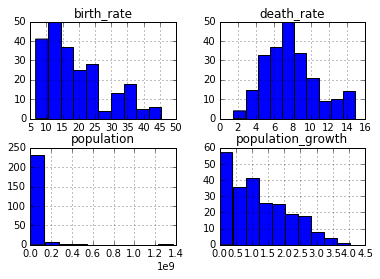

In [23]:
#Generate histograms for all of the columns
import matplotlib.pyplot as plt
%matplotlib inline
results.hist()

## Which countries have the highest population density?

Population density is the ratio of population to land area. Let's calculate the population density using SQL, and compare our results with those from Wikipedia

                                  name  population_density
0                                Macau        21168.964286
1                               Monaco        15267.500000
2                            Singapore         8259.784571
3                            Hong Kong         6655.271202
4                           Gaza Strip         5191.819444
5                            Gibraltar         4876.333333
6                              Bahrain         1771.859211
7                             Maldives         1319.640940
8                                Malta         1310.015823
9                              Bermuda         1299.925926
10                          Bangladesh         1297.977606
11                        Sint Maarten         1167.323529
12                            Guernsey          847.179487
13                              Jersey          838.741379
14                              Taiwan          725.825356
15                            Barbados          675.8232

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d2f84e48>]],
      dtype=object)

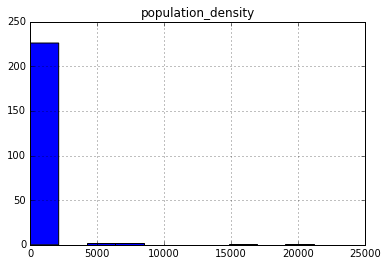

In [35]:
popuden_q = '''
                SELECT name, CAST(population as Float)/CAST(area_land as Float) AS population_density 
                FROM facts 
                WHERE (population != (SELECT MAX(population) FROM facts)) AND 
                (population != (SELECT MIN(population) FROM facts)) 
                ORDER BY population_density DESC;
                '''
popuden_result = pd.read_sql_query(popuden_q, conn)
print(popuden_result)
popuden_result.hist()

Results for the top 5 highest population density are consistent with those from Wikipedia.